In [1]:
import repyrt as rpt


In [3]:
print(rpt.get_sql('test_sql'))

test


In [15]:
props = rpt.acquire_data()
props.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
bathroomcnt                     18639 non-null float64
bedroomcnt                      18639 non-null float64
calculatedfinishedsquarefeet    18639 non-null float64
taxvaluedollarcnt               18639 non-null float64
county                          18639 non-null object
tax_rate                        18639 non-null float64
id                              18639 non-null int64
parcelid                        18639 non-null int64
airconditioningtypeid           6547 non-null float64
airconditioningdesc             6547 non-null object
basementsqft                    12 non-null float64
buildingqualitytypeid           12842 non-null float64
calculatedbathnbr               18633 non-null float64
decktypeid                      140 non-null float64
finishedfloor1squarefeet        1485 non-null float64
finishedsquarefeet12            18589 non-null float64
finishedsquarefeet13     

(18639, 62)

In [16]:
prep_props = rpt.edit_gross_df(props)
prep_props.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 62 columns):
nbr_bedrms                    18639 non-null float64
nbr_bthrms                    18639 non-null float64
finished_sqft                 18639 non-null float64
taxable_value                 18639 non-null float64
county                        18639 non-null object
tax_rate                      18639 non-null float64
id                            18639 non-null int64
pid                           18639 non-null int64
airconditioningtypeid         6547 non-null float64
airconditioningdesc           6547 non-null object
basementsqft                  12 non-null float64
buildingqualitytypeid         12842 non-null float64
calculatedbathnbr             18633 non-null float64
decktypeid                    140 non-null float64
finishedfloor1squarefeet      1485 non-null float64
finishedsquarefeet12          18589 non-null float64
finishedsquarefeet13          7 non-null float64
finished

(18639, 62)

In [6]:
prepped = rpt.edit_prep_df(prep_props)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 4 columns):
nbr_bthrms       18639 non-null float64
nbr_bedrms       18639 non-null float64
finished_sqft    18639 non-null float64
taxable_value    18639 non-null float64
dtypes: float64(4)
memory usage: 582.5 KB


In [7]:
context = rpt.find_context(context_df=prepped, scaler_fn=rpt.standard_scaler)
type(context)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13979 entries, 16998 to 5574
Data columns (total 4 columns):
nbr_bthrms       13979 non-null float64
nbr_bedrms       13979 non-null float64
finished_sqft    13979 non-null float64
dummy_val        13979 non-null int64
dtypes: float64(3), int64(1)
memory usage: 546.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13979 entries, 16998 to 5574
Data columns (total 1 columns):
taxable_value    13979 non-null float64
dtypes: float64(1)
memory usage: 218.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 7183 to 2619
Data columns (total 3 columns):
nbr_bthrms       4660 non-null float64
nbr_bedrms       4660 non-null float64
finished_sqft    4660 non-null float64
dtypes: float64(3)
memory usage: 145.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 7183 to 2619
Data columns (total 1 columns):
taxable_value    4660 non-null float64
dtypes: float64(1)
memory usage: 72.8 KB
<class 'pandas.core.frame.Dat

split_scale.Context

In [8]:
X_train = context.X_train
y_train = context.y_train
train = X_train.join(y_train)

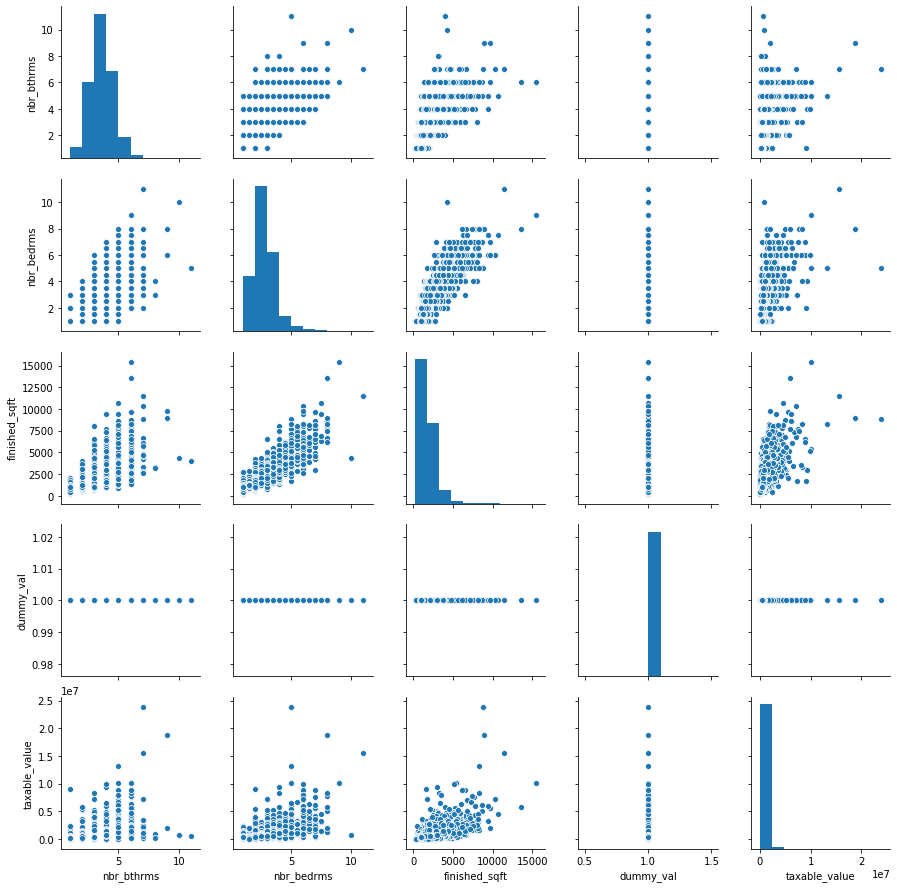

In [9]:
rpt.pairplot_train(train)

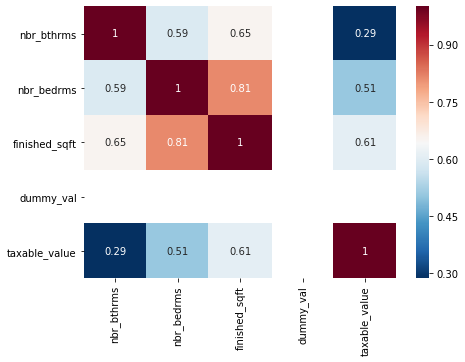

In [10]:
rpt.heatmap_train(train)

In [11]:
#r2_lm1 = rpt.r2_score(y_train,train.yhat)
#r2_lm1

In [12]:
#creating baseline with mean of tax value
context.train['tax_mean'] = train.taxable_value.mean()
train.head()

,nbr_bthrms,nbr_bedrms,finished_sqft,dummy_val,taxable_value
16998,2.0,1.0,1415.0,1,60435.0
11045,2.0,2.0,1198.0,1,63738.0
8902,2.0,2.0,1097.0,1,702000.0
1519,4.0,2.5,2183.0,1,507503.0
12643,3.0,1.0,984.0,1,29101.0


In [13]:
#creating residual of tax value vs expected tax value
train['residual'] = train['yhat'] - train['taxable_value']
train['residual2'] = train.residual **2

train.head()

KeyError: 'yhat'

## MVP

In [ ]:

from sklearn.linear_model import LinearRegression
#pick model type, Linear Regression for the MVP baseline
lm1 = LinearRegression()

In [ ]:
#fit and train model
lm1.fit(X_train,y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

In [ ]:

#converting y_train to panda series
y_train = y_train.taxable_value

In [ ]:
#Plotting residuals
sns.residplot(y_train,train.yhat)

In [ ]:
#MSE, SSE, RMSE
import math
sse = sum(train.residual2)
mse = sse/len(train)
rmse = math.sqrt(mse)
r2 = ols_model.rsquared
print(sse,mse,rmse,r2)

#### Additional Details

In [2]:
# Settings for running in test mode
rpt.local_settings['DEBUG'] = False
rpt.local_settings['SPLAIN'] = False